## 使用heapq构建小根堆/大根堆的方法

### 堆的适用场景：动态求极值。其中动态和极值两个条件缺一不可。即当我们遇到题目需要对一个数组进行持续的插入、删除，然后最终求top(N)问题时，不用想必然是堆排序问题。

### headpq库函数
##### 1. heapq.heappush(数组，数值)  # 数组代表小根堆，将数值添加到这个小根堆里
##### 2. heapq.heappop(数组)         # pop出来这个小根堆的最小值，剩下的自动变成小根堆
##### 3. heapq.heapify(数组)         # 将数组强制变成一个小根堆
##### 4. heapq.heapreplace(数组，n)  # 将最小值弹出，并用n来替代
##### 5. heapq.nlargest(n,数组)/heapq.nsmallest(n,数组)   # 分别是返回数组里的最大的n个元素和最小的n个元素

In [1]:
import heapq

## 构建小根堆的两种方式

#### 法1. 通过heapq.heapush(数组，值)将每一个值push到数组里面

In [10]:
nums = [2,5,1,7,9,10,3,4]
heap = []
for num in nums:
    heapq.heappush(heap, num)
while heap:
    print(heapq.heappop(heap))

1
2
3
4
5
7
9
10


#### 法2. 通过heapify(原始数组)的方式，将原始数组直接变成小根堆

In [12]:
nums = [2,5,1,7,9,10,3,4]
nums = [-1*i for i in nums]
heapq.heapify(nums)
while nums:
    print(-1*(heapq.heappop(nums)))

10
9
7
5
4
3
2
1


## 其他操作

In [20]:
# heapq.heapreplace(nums,n)
nums = [2,5,1,7,9,10,3,4]
heapq.heapify(nums)
heapq.heapreplace(nums,20)  # 把最小值吐出来，并且将20插入进去，相当于先pop，在push
[heapq.heappop(nums) for i in range(8)]

[2, 3, 4, 5, 7, 9, 10, 20]

In [27]:
# heapq.nlargest(n,nums)
nums = [2,5,1,7,9,10,3,4]
heapq.heapify(nums)
heapq.nlargest(3,nums),nums  # 可以看出虽然将最大的数值找出来了，但是原数组并没有改变

([10, 9, 7], [1, 4, 2, 5, 9, 10, 3, 7])

## leetcode中的例子

### LC.1046 [最后一块石头的重量](https://leetcode.cn/problems/last-stone-weight/)
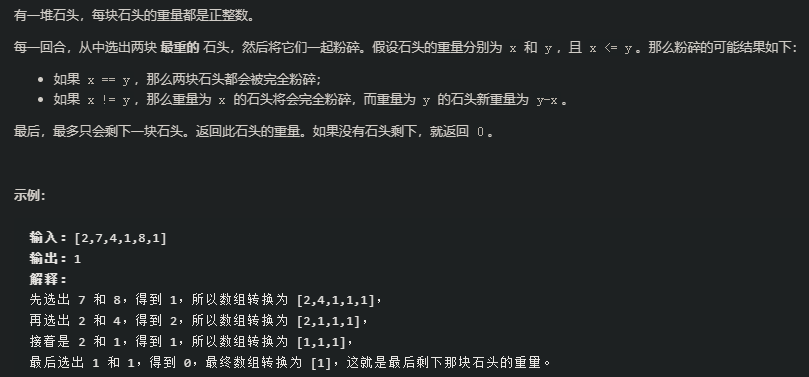

In [32]:
def lc1046(stones):
    # 将石头构建成大根堆
    num = len(stones)
    stones = [-1*i for i in stones]
    heapq.heapify(stones)
    
    # 每次取俩最大的石头，知道剩下一块或者不剩了为止
    while num > 1:
        one,two = heapq.heappop(stones),heapq.heappop(stones) # 此时保证有俩石头
        if one == two:
            num -= 2
            continue
        else:
            heapq.heappush(stones,one-two)
            num -= 1
    if num == 1:
        return heapq.heappop(stones) * -1
    else:
        return 0
lc1046([1,4,6,2,42,6,1,3,25,1,5,3])
# https://leetcode.cn/problems/last-stone-weight/solution/python-zui-da-dui-diao-ku-shou-xie-shi-x-utdj/  手写实现大根堆的例子

1

### LC.313 [超级丑叔](https://leetcode.cn/problems/super-ugly-number/)
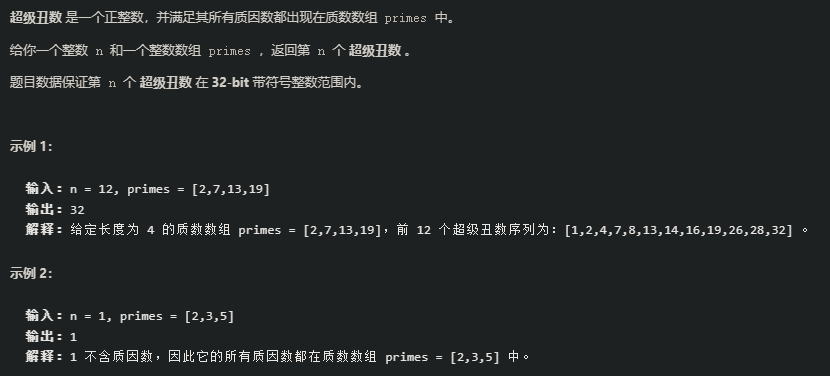

In [33]:
def lc313(n,primes):
    # 建立一个小根堆，记录要添加的数据
    res = 0
    nums = [1]
    heapq.heapify(nums)
    num = 0
    
    # 每次添加最小值*primes,这样可以保证没有遗漏或者跳跃
    while num < n:
        tmp = heapq.heappop(nums)
        while nums and nums[0] == tmp:
            heapq.heappop(nums)
        for i in primes:
            heapq.heappush(nums,i*tmp)
        res = tmp
        num += 1
        # print(res)
    return res
n = 100
primes = [2,3,5]
lc313(n,primes)

1536

### LC.1845 [座位预约管理系统](https://leetcode.cn/problems/seat-reservation-manager/)
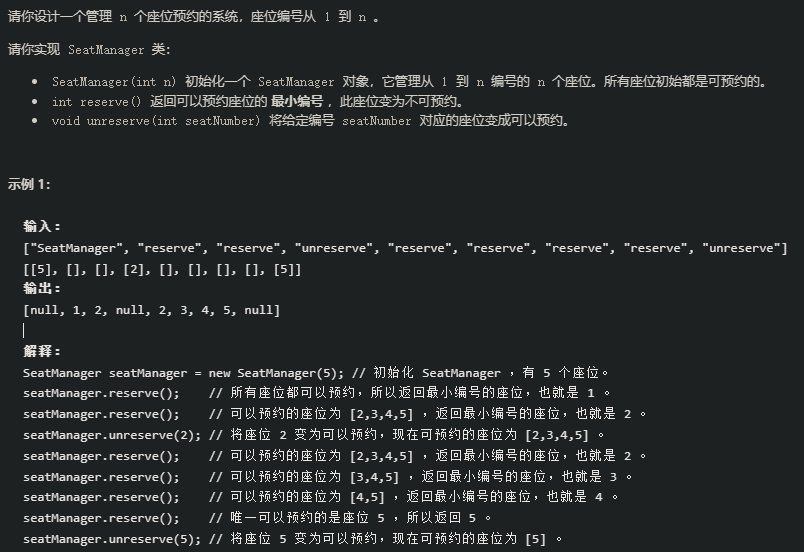

In [35]:
class lc1845:

    def __init__(self, n: int):
        self.nums = [i for i in range(1,n+1)]
        heapq.heapify(self.nums)

    def reserve(self) -> int:
        return heapq.heappop(self.nums)

    def unreserve(self, seatNumber: int) -> None:
        heapq.heappush(self.nums,seatNumber)